### ARMA vs ARIMA vs Cross - Sectional Regression!

Earlier we considered regression models of the form,

$$y_t  = \beta_0 + \beta_1x_{1,t} + ...+ \beta_kx_{k,t} + \epsilon_t,$$
Where $y_t$ is a linear function of the k predictor variables ($x_{1,t},...,x_{k,t}),$ and $\epsilon_t$ is usually assumed to be an uncorrelated error term (i.e., it is white noise).

And, consequently we looked at models which are pure - time series models where errors terms are correlated. ARIMA models.

In this chapter , we will combine both the models so that we can form linear functions of $y_t$ , which are depened on explanatory variables and also its own previous values. 

This will allow the errors from a regression to contain autocorrelation. To emphasise this change in perspective, we will 
repalce $\epsilon_t$ with $\eta_t$ in the equation. The error series $\eta_t$ is assumed to follow an ARIMA model. 

## Estimation
When we estimate the parameters from the model, we need to minimise the sum of squared  __$\epsilon_t$__ values. If we minimise the sum of squared  $\eta_t$ values instead (which is what would happen if we estimated the regression model ignoring the autocorrelations in the errors), then several problems arise.

- The estimated coefficients $\beta_0,...,\beta_k$  are no longer the best estimates, as some information has been ignored in the calculation;0
- Any statistical tests associated with the model (e.g., t-tests on the coefficients) will be incorrect.
- The AICc values of the fitted models are no longer a good guide as to which is the best model for forecasting.
- In most cases, the p -values associated with the coefficients will be too small, and so some predictor variables will appear to be important when they are not. This is known as “spurious regression

Minimising the sum of squared  $\epsilon_t$ values avoids these problems.

An __important__ consideration when estimating a regression with ARMA errors is that all of the __variables__ in the model must first be __stationary.__

One exception to this is the case where non-stationary variables are co-integrated. If there exists a linear combination of the non-stationary $y_t$ and the predictors that is stationary, then the estimated coefficients will be consistent

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
uschange = pd.read_csv(r"./data/uschange.csv").drop("Unnamed: 0",axis=1)

In [4]:
uschange['Date'] = pd.date_range(start='1970-1-1',freq='Q',periods=len(uschange))

In [5]:
uschange.set_index("Date",inplace=True)

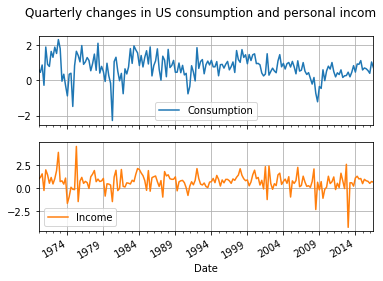

In [6]:
_ = uschange[['Consumption','Income']].plot(subplots=True,grid=True)
_ = plt.suptitle("Quarterly changes in US consumption and personal incom")

###  We would like to forecast changes in consumption based on changes in income

In [7]:
from statsmodels.tsa.arima_model import ARIMA

In [8]:
model = ARIMA(endog=uschange['Consumption'],order=(1,0,2), exog=uschange['Income'], dates=uschange.index, freq='Q', missing='none')

fit = model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            Consumption   No. Observations:                  187
Model:                     ARMA(1, 2)   Log Likelihood                -156.954
Method:                       css-mle   S.D. of innovations              0.560
Date:                Sun, 16 Aug 2020   AIC                            325.908
Time:                        18:23:42   BIC                            345.295
Sample:                    03-31-1970   HQIC                           333.764
                         - 09-30-2016                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5990      0.088      6.777      0.000       0.426       0.772
Income                0.2028      0.046      4.402      0.000       0.113       0.293
ar.L1.Consumption     0.6922      0.116      5.968      0.000       0.465       0.920
ma.L1.Consumption    -0.5758      0.130     -4.427      0.000      -0.831      -0.321
ma.L2.Consumption     0.1984      0.076      2.624      0.009       0.050       0.347
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4446           +0.0000j            1.4446            0.0000
MA.1            1.4514           -1.7131j            2.2453           -0.1381
MA.2            1.4514           +1.7131j            2.2453            0.1381
-----------------------------------------------------------------------------
"""

The fitted model is ,

$$y_t = 0.559 + 0.203x_t + \eta_t,$$
$$\eta_t = 0.692\eta_{t-1} +\epsilon_t - 0.576\epsilon_{t_1} + 0.198\epsilon_{t_2},$$
$$ \epsilon_{t} \sim NID(0,0.322) $$

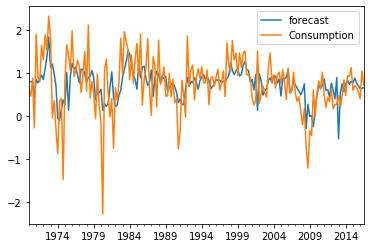

In [9]:
fit.plot_predict();

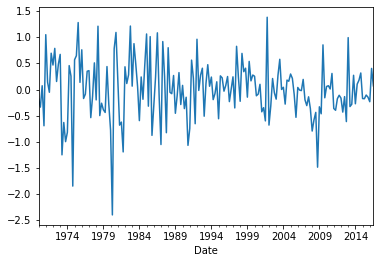

In [10]:
fit.resid.plot()

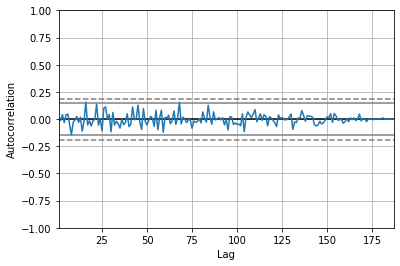

In [11]:
pd.plotting.autocorrelation_plot(fit.resid)

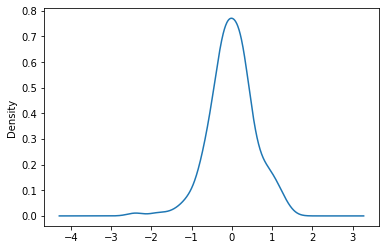

In [12]:
fit.resid.plot(kind='kde')
## todo plo

In [13]:
forecast,stde,cfi = fit.forecast(8,exog=uschange['Income'].iloc[-8:])

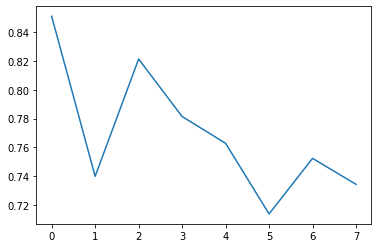

In [14]:
plt.plot(forecast)

In [15]:
elecdaily = pd.read_csv(r"./data/elecdaily.csv")

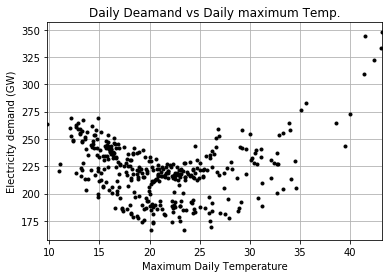

In [16]:
_ = (elecdaily.plot(x='Temperature',y='Demand',style='.',color='k',legend=False,grid=True)
.set(title="Daily Deamand vs Daily maximum Temp.",ylabel='Electricity demand (GW)',
    xlabel='Maximum Daily Temperature'))

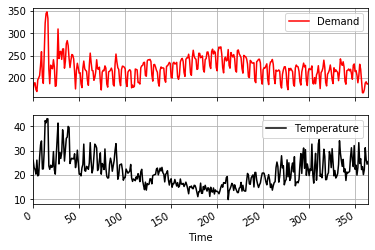

In [17]:
_ = elecdaily[['Demand','Temperature']].plot(subplots=True,color=['r','k'],grid=True)
_ = plt.xlabel("Time")

In [18]:
elecdaily['Temperature^2'] = elecdaily['Temperature']**2

In [19]:
import statsmodels.api as sm

In [20]:
model = sm.tsa.statespace.SARIMAX(endog=elecdaily['Demand'],exog=elecdaily[['Temperature','Temperature^2','WorkDay']],
                          order=(2,1,2),seasonal_order=(2,0,0,7))

In [21]:
fit = model.fit()

C:\Users\91882\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\91882\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\91882\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [22]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             Demand   No. Observations:                  365
Model:             SARIMAX(2, 1, 2)x(2, 0, [], 7)   Log Likelihood               -1202.486
Date:                            Sun, 16 Aug 2020   AIC                           2424.971
Time:                                    18:23:46   BIC                           2463.943
Sample:                                         0   HQIC                          2440.461
                                            - 365                                         
Covariance Type:                              opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Temperature      -7.7465      0.465    -16.671      0.000      -8.657      -6.836
Temperature^2     0.1833      0.009     20.944      0.000       0.166       0.200
WorkDay          31.9162      1.204     26.514      0.000      29.557      34.276
ar.L1            -0.0424      0.108     -0.394      0.694      -0.254       0.169
ar.L2             0.6605      0.089      7.444      0.000       0.487       0.834
ma.L1            -0.0595      0.085     -0.702      0.482      -0.226       0.107
ma.L2            -0.8939      0.081    -11.091      0.000      -1.052      -0.736
ar.S.L7           0.1709      0.049      3.514      0.000       0.076       0.266
ar.S.L14          0.3886      0.058      6.694      0.000       0.275       0.502
sigma2           42.7642      2.374     18.016      0.000      38.112      47.417
===================================================================================
Ljung-Box (Q):                       64.56   Jarque-Bera (JB):               209.15
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             0.42
Prob(H) (two-sided):                  0.04   Kurtosis:                         6.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [24]:
acorr_ljungbox(fit.resid.dropna(),return_df=True,model_df=10,lags=14)

,lb_stat,lb_pvalue
1,1.128661,NaN
2,1.128826,NaN
3,1.810275,NaN
4,2.343080,NaN
5,2.829480,NaN
6,2.853519,NaN
7,2.879316,NaN
8,3.184829,NaN
9,4.463747,NaN
10,4.491532,NaN


In [25]:
austa = pd.read_csv(r"./data/austa.csv")

In [26]:
austa = austa[['time','value']].set_index("time")
austa.index = pd.to_datetime(austa.index,format="%Y")

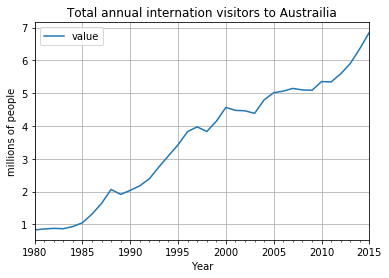

In [27]:
_ = austa.plot(grid=True).set(title="Total annual internation visitors to Austrailia",
                xlabel='Year',ylabel='millions of people')

In [28]:
model = ARIMA(endog=austa['value'].values,exog=list(range(1,len(austa)+1)),
              order=(2,0,0))

In [29]:
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:                     ARMA(2, 0)   Log Likelihood                  13.601
Method:                       css-mle   S.D. of innovations              0.163
Date:                Sun, 16 Aug 2020   AIC                            -17.202
Time:                        18:23:46   BIC                             -9.285
Sample:                             0   HQIC                           -14.439
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4156      0.190      2.191      0.028       0.044       0.787
x1             0.1710      0.009     19.456      0.000       0.154       0.188
ar.L1.y        1.1127      0.160      6.953      0.000       0.799       1.426
ar.L2.y       -0.3805      0.158     -2.402      0.016      -0.691      -0.070
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4623           -0.7001j            1.6212           -0.0711
AR.2            1.4623           +0.7001j            1.6212            0.0711
-----------------------------------------------------------------------------
"""

#  Determinstic trend 
 here , we have manually defined a term for linear time variable i.e. x1
 
 The model can be written as 
$$y_t = 0.416 + 0.171t + \eta_t$$
$$\eta_t = 1.113\eta_{t-1} - 0.3805\eta_{t-2} + \epsilon_t$$
$$\epsilon_t \sim NID(0,0.030)$$

In [30]:
model = ARIMA(endog=austa['value'].values,order=(0,1,1))

In [31]:
fit = model.fit();fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   35
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  10.619
Method:                       css-mle   S.D. of innovations              0.178
Date:                Sun, 16 Aug 2020   AIC                            -15.238
Time:                        18:23:46   BIC                            -10.572
Sample:                             1   HQIC                           -13.627
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1735      0.039      4.452      0.000       0.097       0.250
ma.L1.D.y      0.3006      0.165      1.825      0.068      -0.022       0.623
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -3.3268           +0.0000j            3.3268            0.5000
-----------------------------------------------------------------------------
"""

In [32]:
fit.sigma2

0.03182900816873202

# Case 2 : Stochastic Trend

 The model can be written as 
$$y_t = y_0 + 0.173t + \eta_t$$
$$\eta_t = \eta_{t-1} + 0.301\epsilon_{t-1} + \epsilon_t$$
$$\epsilon_t \sim NID(0,0.034)$$

There is an implicit __assumption with deterministic trends__ that the slope of the __trend is not going to change over time__.

On the other hand, __stochastic trends__ can change, and the estimated growth is only assumed to be the __average growth over the historical period__, not necessarily the rate of growth that will be observed into the future.

Consequently, it is safer to forecast with stochastic trends, especially for longer forecast horizons, as the prediction intervals allow for greater uncertainty in future growth.

## Dynamic Harmonc regression

When the seasonality is large i.e. when m > 200 , we prefer a harmonic regresion approach where the seasonal patten is modelled using Fourier terms with short-term series dynamics handled by an ARMA error.


The advantages of this approach are:

- vit allows any length seasonality;
- for data with more than one seasonal period, Fourier terms of    different frequencies can be included;
- the smoothness of the seasonal pattern can be controlled by  K
 , the number of Fourier sin and cos pairs – the seasonal pattern is  smoother for smaller values of  K;
- the short-term dynamics are easily handled with a simple ARMA error.

In [43]:
auscafe = pd.read_csv(r"./data/auscafe.csv")

from utils import ease

auscafe = ease.convert_r_dataframe_to_python(auscafe)

auscafe = auscafe.set_index("date")[['value']]

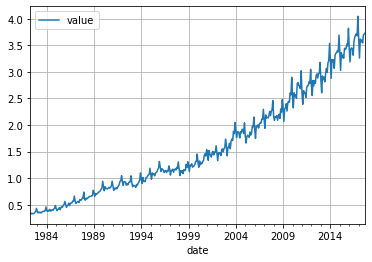

In [46]:
auscafe.plot(grid=True)

In [49]:
import statsmodels